In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

import scipy.cluster.hierarchy as spc

### Topic analysis

In [2]:
df_topic = pd.read_pickle("data/weibo/topic.pkl")
df_topic.drop(columns='mid')

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.008475,0.008475,0.025424,0.008475,0.008475,0.008475,0.008475,0.008475,0.025424,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
1,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937,0.087302,0.007937,0.007937,...,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937
2,0.005952,0.005952,0.005952,0.041667,0.005952,0.005952,0.005952,0.041667,0.017857,0.005952,...,0.005952,0.005952,0.005952,0.029762,0.005952,0.005952,0.005952,0.005952,0.089286,0.017857
3,0.005208,0.005208,0.005208,0.005208,0.005208,0.005208,0.005208,0.005208,0.005208,0.005208,...,0.005208,0.015625,0.005208,0.005208,0.005208,0.005208,0.005208,0.005208,0.005208,0.005208
4,0.017045,0.005682,0.005682,0.005682,0.005682,0.005682,0.005682,0.005682,0.005682,0.005682,...,0.005682,0.005682,0.005682,0.005682,0.005682,0.005682,0.017045,0.005682,0.005682,0.005682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299789,0.009615,0.009615,0.009615,0.009615,0.009615,0.009615,0.009615,0.009615,0.009615,0.009615,...,0.009615,0.009615,0.009615,0.009615,0.009615,0.009615,0.028846,0.009615,0.009615,0.009615
299790,0.015000,0.005000,0.005000,0.005000,0.005000,0.005000,0.035000,0.005000,0.005000,0.005000,...,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.025000,0.005000
299791,0.006410,0.006410,0.006410,0.006410,0.006410,0.006410,0.006410,0.006410,0.006410,0.006410,...,0.006410,0.006410,0.006410,0.006410,0.006410,0.006410,0.006410,0.006410,0.006410,0.006410
299792,0.005682,0.005682,0.005682,0.005682,0.005682,0.005682,0.005682,0.017045,0.017045,0.005682,...,0.017045,0.005682,0.005682,0.005682,0.005682,0.005682,0.005682,0.005682,0.119318,0.028409


Clustering 

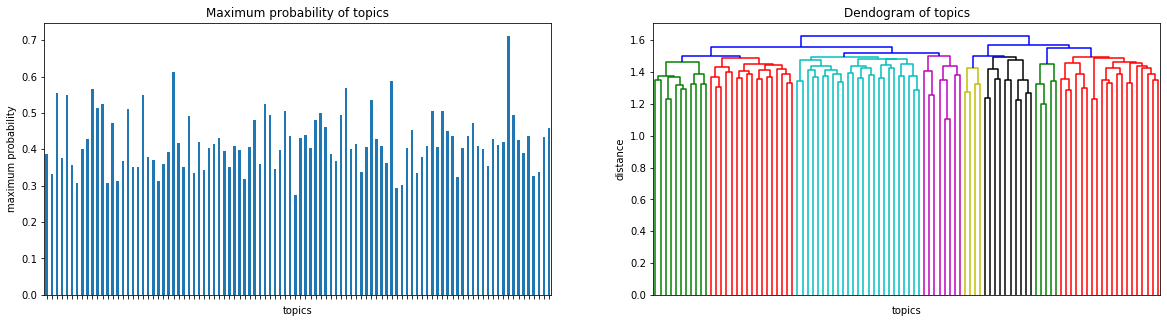

In [11]:
df_topic_sample = df_topic.drop(columns='mid').sample(n = 10000)

fig, ax = plt.subplots(1,2, figsize = (20, 5))
corr = df_topic_sample.corr().values
N_TOPICS = 8

pdist = spc.distance.pdist(corr, metric='euclidean')
linkage = spc.linkage(pdist, method='complete',)
idx = spc.fcluster(linkage, N_TOPICS, 'maxclust')

df_topic.drop(columns='mid').max().plot.bar(ax=ax[0])
ax[0].set_title("Maximum probability of topics")
ax[0].set_xlabel('topics')
ax[0].set_xticklabels([])
ax[0].set_ylabel('maximum probability')

dn = spc.dendrogram(linkage, ax=ax[1], color_threshold=1.503)
ax[1].set_title(f"Dendogram of topics")
ax[1].set_xlabel('topics')
ax[1].set_xticklabels([])
ax[1].set_ylabel(f"distance")

plt.show()

In [29]:
c, t = spc.cophenet(linkage,pdist)
print(f"Cophenetic correlation inside clusters : {c}")

Cophenetic correlation inside clusters : 0.5268204514511377


In [12]:
for topic in range(N_TOPICS) :
    print(f"topic {topic} = {np.arange(0,100,1)[idx - 1 == topic]}")

topic 0 = [ 3 12 14 37 39 52 64 72 74 75 93]
topic 1 = [ 2  4 19 25 29 33 35 48 62 67 69 76 78 82 84 86 94]
topic 2 = [ 1  5  9 10 15 18 20 22 23 27 40 41 43 50 51 54 57 63 68 70 80 90 91 95
 96]
topic 3 = [ 6 16 28 42 44 53 83 99]
topic 4 = [ 8 31 55 88]
topic 5 = [ 0 13 24 26 46 56 60 66 79 89]
topic 6 = [36 38 49 71 85]
topic 7 = [ 7 11 17 21 30 32 34 45 47 58 59 61 65 73 77 81 87 92 97 98]


Text(0.5, 0.98, 'Correlation matrix between topics')

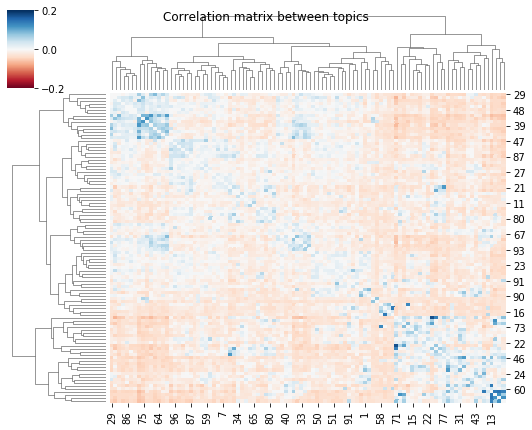

In [8]:
sns.clustermap(corr - np.identity(100), method="complete", cmap='RdBu', 
               annot_kws={"size": 7}, vmin=-0.2, vmax=0.2, figsize=(7.5,6))

plt.suptitle("Correlation matrix between topics")

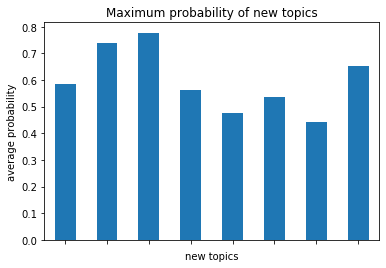

In [22]:
def convert_new_topic(df_topic, idx) : 
    """
    input : df_topic, idx st idx[i] is the new topic of i
    output : df with N_TOPICS columns 
    """
    df_new = pd.DataFrame(np.zeros((df_topic.shape[0], N_TOPICS + 1)), columns=['mid'] + [str(k) for k in range(N_TOPICS)])
    df_new['mid'] = df_topic['mid']
    for i in range(100) : 
        new_i = idx[i] -1
        df_new[str(new_i)] += df_topic[str(i)]
    return df_new

df_new_topic = convert_new_topic(df_topic, idx)

fig, ax = plt.subplots(1,1)
df_new_topic.drop(columns='mid').max().plot.bar(ax=ax)
ax.set_title("Maximum probability of new topics")
ax.set_xlabel('new topics')
ax.set_xticklabels([])
ax.set_ylabel('average probability')
plt.show()


In [30]:
df_new_topic.to_pickle(f"data/weibo_preprocessed/topics_{N_TOPICS}.pkl")

Best examples of topics

In [11]:
with open('data/weibo/weibodata/root_content.txt', 'r', encoding='gb18030' ) as file :
    i = 0
    d_content_roots = {}
    mid = ''
    for l in file : 
        if i % 2 == 0:
            mid = l.replace('\n', '').replace('\t', '')
        else : 
            d_content_roots[mid] = l.replace('\n', '').replace('\t', '')
        i += 1


In [12]:
def best_examples_topic(df_topic, topic, k) : 
    """
    Returns the first k messages having the highest probability of being in topic 
    format : 
        mid probability
        content
    """
    mids = df_topic[['mid', str(topic)]].sort_values(by = str(topic), ascending=False)[:k]
    s = ""
    for i in range(k) : 
        s_k = f"{mids.iloc[i, 0]} {mids.iloc[i, 1]} \n{d_content_roots[str(mids.iloc[i,0])]} \n"
        #print(s_k)
        s += s_k
    return s

In [ ]:
with open("data/weibo/best_3_examples_topic.txt", 'w') as file : 
    for topic in range(100) : 
        file.write(f"{topic}\n")
        file.write(best_examples_topic(df_topic, topic, 20))
        if topic % 10 == 0 : 
            print(f"{topic}%")
print(f"End")

In [28]:
topic, k = 1, 5
print(f"The {k} best examples of topic {topic} are : ")
print(best_examples_topic(df_new_topic, topic, k))

The 5 best examples of topic 1 are : 
201110330456710158 0.7252747252747253 
【在5秒钟内找到我】钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱我钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱 
3385504974698569 0.7085714285714285 
【5秒钟内找不到\"我\"的自觉转发】钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱我钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱 
2111104203607905 0.7068965517241379 
【你能在5秒钟内在钱堆里找到“我”吗？】钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱我钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱 
3382237611624165 0.7028571428571428 
【5秒钟内找不到\"我\"的自觉转发】钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱我钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱钱 
3515869651296239 0.5566037735849058 
买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？买？不买？ 



### Interpretation of new topics

See the file topics.txt

In [28]:
df_new_topic['2d_largest_prob'] = df_new_topic.apply(lambda row : row.nlargest(3).values[-1], axis=1)

In [31]:
def best_examples_topic2(df_topic, topic, k) : 
    """
    Returns the first k messages where the difference between the probability of being in the topic k and the second largest probability is the highest : 
        mid probability
        content
    """
    df_topic['temp'] = df_topic[str(topic)] - df_topic['2d_largest_prob']
    mids = df_topic[['mid', str(topic), 'temp']].sort_values(by = 'temp', ascending=False)[:k]
    s = ""
    for i in range(k) : 
        s_k = f"{mids.iloc[i, 0]} {mids.iloc[i, 1]} {mids.iloc[i, 2]}\n{d_content_roots[str(mids.iloc[i,0])]} \n"
        #print(s_k)
        s += s_k
    return s

print(best_examples_topic2(df_new_topic, 0, 10))

NameError: name 'd_content_roots' is not defined

In [25]:
with open("figures/topic_analysis/examples_topic8_2.txt", 'w', encoding='utf-8') as file : 
    for topic in range(N_TOPICS) : 
        file.write(f"{topic}\n")
        file.write(best_examples_topic2(df_new_topic, topic, 20))
print(f"End")

End


Distributions

Text(0.5, 0, 'log probability')

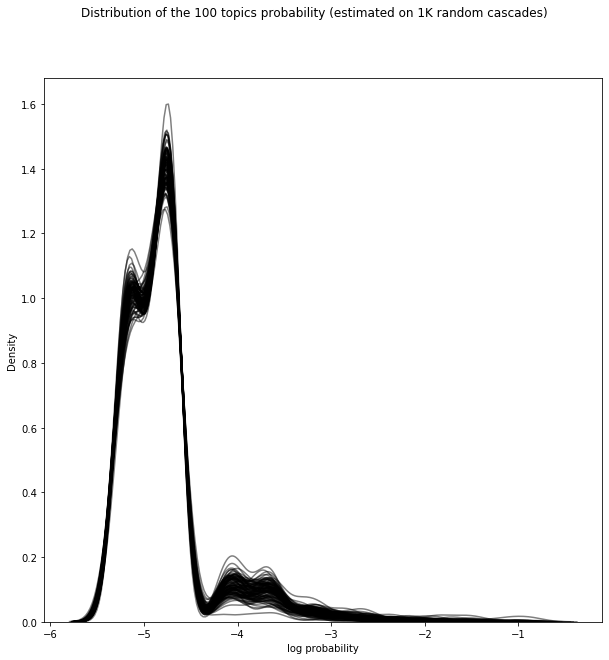

In [20]:
df = df_topic.sample(n = 1000)
fig,ax = plt.subplots(figsize = (10,10))

for i in range(100) : 
    sns.kdeplot(df[str(i)].apply(np.log), ax = ax, alpha=0.5, color='black')
fig.suptitle("Distribution of the 100 topics probability (estimated on 1K random cascades)")
ax.set_xlabel("log probability")

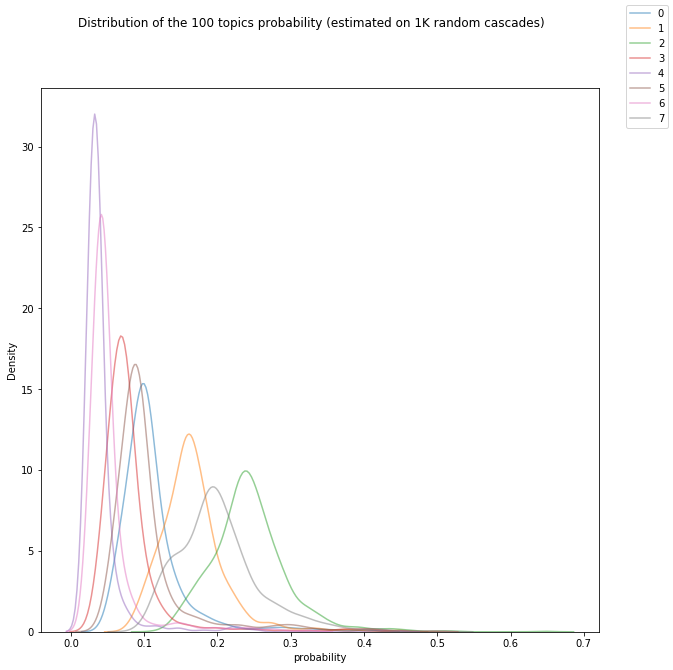

In [26]:
df = df_new_topic.sample(n = 1000)
fig,ax = plt.subplots(figsize = (10,10))

for i in range(8) : 
    sns.kdeplot(df[str(i)], ax = ax, alpha=0.5, label=str(i))
fig.suptitle("Distribution of the 100 topics probability (estimated on 1K random cascades)")
ax.set_xlabel("probability")
fig.legend()

### How it is related to influencers

In [29]:
infos_cascades = pd.read_pickle("data/weibo_preprocessed/infos_cascades.pkl")

In [33]:
(set(infos_cascades.mid) - set(df_new_topic.mid))

134

end